In [20]:
import pandas as pd
from os.path import join
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from utils import load_samples
DATA_PATH = "/home/ecunha/omics-integration/results/dsalina/PRJNA437866/"
from gsmmutils.model.COBRAmodel import MyModel

In [28]:
data = load_samples(DATA_PATH, samples=["control", "nacl", "h2o2", "sorb"])

In [3]:
#sns.clustermap(data['fastcore'], cmap="viridis", z_score=0)

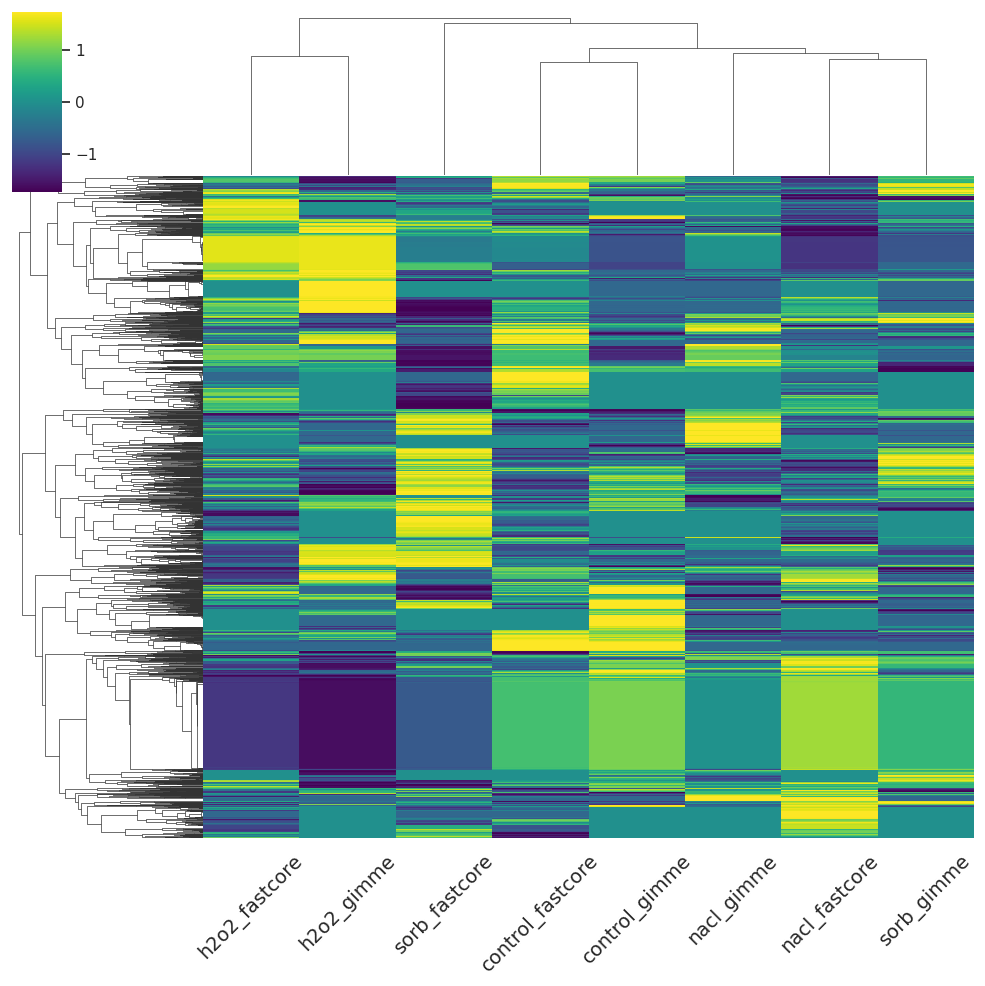

In [4]:
g= sns.clustermap(data['all'], cmap="viridis", yticklabels =False)

plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, fontsize=14)

print()

In [29]:
gimme = data['gimme']

In [293]:
(0.73-0.97)/(0.73+0.97)

-0.1411764705882353

In [40]:
gimme.loc["R09692__chlo"]

control_gimme    0.002534
nacl_gimme       0.000000
h2o2_gimme       0.000000
sorb_gimme       0.002182
Name: R09692__chlo, dtype: float64

In [32]:
gimme.loc[gimme.index.str.startswith("EX")]

,control_gimme,nacl_gimme,h2o2_gimme,sorb_gimme
EX_C02823__dra,-0.000136,-0.000123,-0.000110,-0.000121
EX_e_Biomass__dra,0.190085,0.171219,0.153962,0.168714
EX_C14818__dra,-8.859592,-10.440865,-10.142433,-23.915370
EX_C00533__dra,0.055719,0.046127,0.065689,0.069660
EX_C00080__dra,-0.996517,-0.402224,-0.173294,-0.203516
EX_C00378__dra,-0.000508,-0.000458,-0.000411,-0.000451
EX_C00120__dra,-0.000884,-0.000796,-0.000716,-0.000784
EX_C00001__dra,-6.245804,-6.421654,-6.384738,-5.546065
EX_C00177__dra,0.000136,0.000123,0.000110,0.000121
EX_C00059__dra,-0.021012,-0.018927,-0.017019,-0.018650


In [389]:
bmgr = gimme.loc[(gimme.index.str.startswith("BMGR")) &  (
                                                            (gimme.index.isin(model.pathway_reactions_map["BOIMMG (TAG)"])) |
                                                           ((gimme.index.isin(model.pathway_reactions_map["BOIMMG (DAG)"]))) |
                                                          ((gimme.index.isin(model.pathway_reactions_map["BOIMMG (PA)"])))
                                                         )]
bmgr = bmgr.filter(regex="N3|C3|P3|C5|P5|N5")
# bmgr = bmgr.filter(regex="N3|C3|C5|N5")
bmgr = bmgr.loc[~bmgr.index.str.contains("mem")]
row_std = bmgr.std(axis=1)
bmgr = bmgr[row_std != 0]
# bmgr = bmgr.loc[bmgr.index.isin(res.loc[abs(res.FC>0.67)].index)]
bmgr.head()

,C3_gimme,C5_gimme,N3_gimme,N5_gimme,P3_gimme,P5_gimme
BMGR6355__er,0.000010,0.000022,0.000017,0.000022,0.000013,0.000013
BMGR3616__er,0.208975,0.143865,0.147203,0.120030,0.144911,0.123123
BMGR0422__chlo,0.000977,0.000629,0.000912,0.000315,0.000749,0.000460
BMGR6251__chlo,0.000492,0.000436,0.000262,0.000353,0.000428,0.000505
BMGR5829__lip,0.718501,0.472163,0.465775,0.458076,0.527897,0.436922


In [437]:
gimme.loc["EX_C00244__dra"]

C3_gimme   -1.029514
C5_gimme   -0.946478
N3_gimme   -0.973327
N5_gimme   -1.181753
P3_gimme   -1.178531
P5_gimme   -1.181732
Name: EX_C00244__dra, dtype: float64

In [436]:
1.799*0.25

0.44975

In [261]:
c3n3 = pd.read_csv("/home/ecunha/omics-integration/results/ngaditana/PRJNA589063/dfa/C3_gimme_0.4_loopless_ACHR_N3_gimme_0.4_loopless_ACHR_all_results.tsv", index_col=0, sep="\t")
c5n5 = pd.read_csv("/home/ecunha/omics-integration/results/ngaditana/PRJNA589063/dfa/C5_gimme_0.4_loopless_ACHR_N5_gimme_0.4_loopless_ACHR_all_results.tsv", index_col=0, sep="\t")
c3p3 = pd.read_csv("/home/ecunha/omics-integration/results/ngaditana/PRJNA589063/dfa/C3_gimme_0.4_loopless_ACHR_P3_gimme_0.4_loopless_ACHR_all_results.tsv", index_col=0, sep="\t")
c5p5 = pd.read_csv("/home/ecunha/omics-integration/results/ngaditana/PRJNA589063/dfa/C5_gimme_0.4_loopless_ACHR_P5_gimme_0.4_loopless_ACHR_all_results.tsv", index_col=0, sep="\t")



# res.loc[(res.index.isin(model.pathway_reactions_map['Fatty acid biosynthesis']))&(res.FC>0)&(res.Padj<0.05)&(res.index.str.endswith("top"))].shape
# res

In [45]:
res.loc[(res.index.isin(model.pathway_reactions_map['Fatty acid biosynthesis']))&(res.FC>0)&(res.Padj<0.05)].shape

(42, 4)

In [43]:
res.loc[(res.index.isin(model.pathway_reactions_map['Fatty acid biosynthesis']))&(res.FC<-0.0)&(res.Padj<0.05)&(res.index.str.endswith("top"))].shape

(44, 4)

In [44]:
res.loc[(res.index.isin(model.pathway_reactions_map['Fatty acid biosynthesis']))&(res.FC<-0.0)&(res.Padj<0.05)].shape

(86, 4)

In [434]:
# model = MyModel("/home/ecunha/omics-integration/data/ngaditana/models/model_ng.xml", "e_Biomass__cytop")
c3 = MyModel("/home/ecunha/omics-integration/results/ngaditana/PRJNA589063/integration/models/N3_fastcore_0.4_loopless.xml", "e_Biomass__cytop")

Loading

Reactions: 2983
Metabolites: 2315
Genes: 1025
Model loaded


In [387]:
labels = []
ec_number_enzyme_map = {"3.1.1.3": "LIP", "2.3.1.20": "DGAT", "2.3.1.158": "PDAT", "1.14.19.25": "FAD3",
                       "3.1.1.23": "MLIP", "3.1.3.36": "INPP5K", "2.7.1.68": "PIP5K", "2.7.8.11": "PIS","3.1.3.4": "PAH1",
                       "1.14.19.30": "D5Des", "2.3.1.22": "LPGAT1", "1.14.19.47": "DES6", "1.14.19.22": "FAD2",
                       "1.14.19.25,1.14.19.35": "FAD3", "2.7.1.107": "DGKG", '1.14.19.25,1.14.19.36': "FAD3",
                       "1.14.19.45": "desA", "2.3.1.15": "GPAT", "2.3.1.51": "LPAT"}
for reaction in bmgr.index.tolist():
    ec_number = model.reactions.get_by_id(reaction).annotation.get("ec-code", "")
    if isinstance(ec_number, list):
        ec_number = ','.join(ec_number)
    labels.append(ec_number_enzyme_map.get(ec_number, ""))
    # labels.append(ec_number)
labels

['desA',
 'GPAT',
 'PAH1',
 'LPAT',
 'LIP',
 'GPAT',
 'LIP',
 'DGAT',
 'D5Des',
 'PAH1',
 'PAH1',
 'PAH1',
 'LIP',
 'LPGAT1',
 'FAD3',
 'LIP',
 'PAH1',
 'PAH1',
 'LPAT',
 'GPAT',
 'LPGAT1',
 'DGAT',
 'GPAT',
 'LPAT',
 'LPGAT1',
 'LIP',
 'LPAT',
 'LPAT',
 'LPAT',
 'PAH1',
 'LPAT',
 'LPAT',
 'DES6',
 'LPGAT1',
 'PAH1',
 'MLIP',
 'DGAT',
 'LPAT',
 'PAH1',
 'LIP',
 'LIP',
 'LPAT',
 'MLIP',
 'MLIP',
 'GPAT',
 'LIP',
 'LIP',
 'LPGAT1',
 'PAH1',
 'PDAT',
 'FAD3',
 'LPAT',
 'LIP',
 'DGAT',
 'LPAT',
 'LIP',
 'FAD2',
 'LPAT',
 'DGAT',
 'DES6',
 'LIP',
 'PAH1',
 'PDAT',
 'DES6',
 'LIP',
 'LPGAT1',
 'FAD2',
 'LIP',
 'LIP',
 'LPAT',
 'LIP',
 'GPAT',
 'LPAT',
 'LPAT',
 'DGAT',
 'GPAT',
 'LIP',
 'PAH1',
 'DGAT',
 'LIP',
 'LPAT',
 'LIP',
 'PAH1',
 'LIP',
 'DGAT',
 'PDAT',
 'MLIP',
 'GPAT',
 'desA',
 'desA',
 'LPAT',
 'LPAT',
 'MLIP',
 'LIP',
 'PAH1',
 'DGAT',
 'PAH1',
 'FAD2',
 'LPAT',
 'LPAT',
 'LIP',
 'LIP',
 'DGAT',
 'LPAT',
 'PAH1',
 'LPAT',
 'FAD3',
 'LPAT',
 'GPAT',
 'DGAT',
 'LPAT',
 'LPAT',
 '

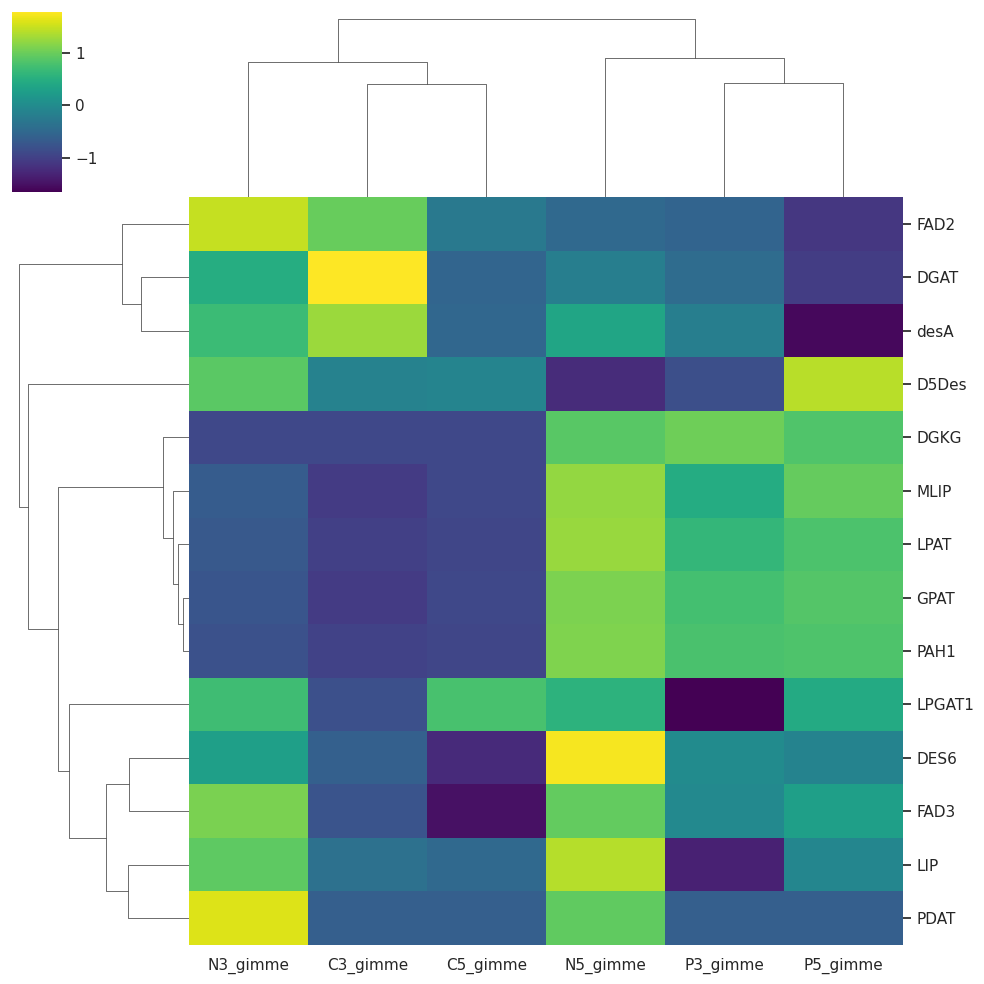

In [392]:
import numpy as np
np.random.seed(42)
from copy import deepcopy
tmp = deepcopy(bmgr)
tmp.index= labels
grouped_df = tmp.groupby(tmp.index).mean()
g = sns.clustermap(grouped_df, cmap="viridis", z_score=0)
# g.ax_heatmap.set_yticks(np.arange(len(labels)))
# g.ax_heatmap.set_yticklabels(labels, fontsize=7, rotation=0)